In [1]:
import pandas as pd
import pandasql as ps
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as smo
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


import geopandas as gpd
# import psycopg2
# import plotly.express as px

In [2]:
# Higher square footage increases home sale price

In [3]:
dfAll = pd.read_csv("../../references/dfAll.csv")

In [4]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data=dfAll).fit()

In [5]:
# fsuckym.summary()
dfAll['Wfnt'] = dfAll['WfntLocation'] >0

In [6]:
# Taking only Single Family Residences between 50000 and 1000000
q2 = ("""
SELECT * 
FROM dfAll
WHERE PropertyType = 11 and SalePrice > 50000 and SalePrice < 10000000 and SqFtTotLiving < 8000
""")
dfAll2 = ps.sqldf(q2)

In [7]:
ssuckym = ols(formula="SalePrice ~ SqFtTotLiving + ZipCode + Wfnt ", data=dfAll2).fit()

In [8]:
ssuckym.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     248.5
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:37:17   Log-Likelihood:            -2.3847e+05
No. Observations:               17024   AIC:                         4.773e+05
Df Residuals:                   16855   BIC:                         4.786e+05
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.231e+05   2.95e+05      0.757      0.449   -3.55e+05    8.01e+05
ZipCode[T.98]           5.84e+05   3.61e+05      1.617      0.106   -1.24e+05    1.29e+06
ZipCode[T.98001]      -3.685e+05   2.95e+05     -1.248      0.212   -9.47e+05     2.1e+05
ZipCode[T.98001.0]    -4.501e+05   2.99e+05     -1.505      0.132   -1.04e+06    1.36e+05
ZipCode[T.98002]      -3.292e+05   2.96e+05     -1.114      0.265   -9.08e+05     2.5e+05
ZipCode[T.98002.0]    -3.503e+05   3.04e+05     -1.153      0.249   -9.46e+05    2.45e+05
ZipCode[T.98003]      -3.438e+05   2.95e+05     -1.164      0.245   -9.23e+05    2.35e+05
ZipCode[T.98003.0]     -3.61e+05   2.98e+05     -1.213      0.225   -9.44e+05    2.22e+05
ZipCode[T.98004]       1.161e+06   2.96e+05      3.929      0.000    5.82e+05    1.74e+06
ZipCode[T.98004.0]      1.38e+06      3e+05      4.599      0.000    7.92e+05    1.97e+06
ZipCode[T.98005]         3.6e+05   2.96e+05      1.215      0.224   -2.21e+05    9.41e+05
ZipCode[T.98005.0]     1.064e+05   3.07e+05      0.347      0.729   -4.95e+05    7.08e+05
ZipCode[T.98006]       1.195e+05   2.95e+05      0.405      0.686   -4.59e+05    6.98e+05
ZipCode[T.98006.0]     2.125e+05   2.99e+05      0.712      0.477   -3.73e+05    7.98e+05
ZipCode[T.98007]       6.695e+04   2.96e+05      0.226      0.821   -5.14e+05    6.48e+05
ZipCode[T.98007.0]     1.683e+05   3.23e+05      0.521      0.602   -4.65e+05    8.01e+05
ZipCode[T.98008]       1.093e+05   2.95e+05      0.370      0.711    -4.7e+05    6.89e+05
ZipCode[T.98008.0]     9373.5107   3.06e+05      0.031      0.976    -5.9e+05    6.09e+05
ZipCode[T.98010]      -4.007e+05   2.98e+05     -1.346      0.178   -9.84e+05    1.83e+05
ZipCode[T.98010.0]    -7.087e+05    3.3e+05     -2.149      0.032   -1.36e+06   -6.24e+04
ZipCode[T.98011]      -1.656e+05   2.96e+05     -0.560      0.576   -7.45e+05    4.14e+05
ZipCode[T.98011.0]     -1.69e+05   3.06e+05     -0.552      0.581   -7.69e+05    4.31e+05
ZipCode[T.98014]      -1.854e+05   2.97e+05     -0.625      0.532   -7.67e+05    3.96e+05
ZipCode[T.98014.0]     5.257e+05    3.4e+05      1.544      0.123   -1.42e+05    1.19e+06
ZipCode[T.98019]      -2.143e+05   2.96e+05     -0.724      0.469   -7.95e+05    3.66e+05
ZipCode[T.98019.0]    -3.496e+05    3.3e+05     -1.061      0.289   -9.96e+05    2.96e+05
ZipCode[T.98022]      -3.429e+05   2.96e+05     -1.160      0.246   -9.22e+05    2.36e+05
ZipCode[T.98022.0]     -4.11e+05      3e+05     -1.371      0.171   -9.99e+05    1.77e+05
ZipCode[T.98023]      -4.191e+05   2.95e+05     -1.420      0.156   -9.98e+05    1.59e+05
ZipCode[T.98023-7841] -3.609e+05   4.17e+05     -0.866      0.387   -1.18e+06    4.56e+05
ZipCode[T.98023.0]    -3.346e+05   2.99e+05     -1.120      0.263    -9.2e+05    2.51e+05
ZipCode[T.98024]      -

In [9]:
pvc_df = dfAll2[['SalePrice','ZipCode','SqFtTotLiving']]
pvc_df.dropna(inplace=True)

<ipython-input-9-cc3b41619312>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df.dropna(inplace=True)


In [10]:
pvc_df

,SalePrice,ZipCode,SqFtTotLiving
0,560000,98019,1930.0
1,435000,98038,1975.0
2,775000,98177,2080.0
4,1255000,98006,2680.0
5,400000,98030,2540.0
...,...,...,...
19603,835000,98126,2380.0
19605,700988,98058,2790.0
19606,1550000,98040,3830.0
19607,930000,98116,2600.0


In [11]:
pvc_df['ZipCodeFix'] = pvc_df['ZipCode'].str.split('-').str[0]
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(float)
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(str)
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].str.split('.').str[0]
pvc_df['Wfnt'] = dfAll['Wfnt']


<ipython-input-11-b549e84204aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df['ZipCodeFix'] = pvc_df['ZipCode'].str.split('-').str[0]
<ipython-input-11-b549e84204aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(float)
<ipython-input-11-b549e84204aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [12]:
stupid = pd.DataFrame(ols(formula="SalePrice ~ SqFtTotLiving + ZipCodeFix", data=pvc_df).fit().params)

In [13]:
# stupid[0] = stupid[0].astype(str)
# stupid.to_csv('test.csv')

In [14]:
ols(formula="SalePrice ~ SqFtTotLiving + ZipCodeFix", data=pvc_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     378.1
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:37:18   Log-Likelihood:            -2.4022e+05
No. Observations:               17024   AIC:                         4.806e+05
Df Residuals:                   16941   BIC:                         4.813e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.961e+05   3.26e+05      0.602      0.547   -4.43e+05    8.35e+05
ZipCodeFix[T.98]      5.62e+05   3.99e+05      1.408      0.159    -2.2e+05    1.34e+06
ZipCodeFix[T.98001] -3.571e+05   3.26e+05     -1.094      0.274   -9.97e+05    2.83e+05
ZipCodeFix[T.98002] -3.002e+05   3.27e+05     -0.919      0.358    -9.4e+05     3.4e+05
ZipCodeFix[T.98003]  -3.44e+05   3.26e+05     -1.054      0.292   -9.84e+05    2.96e+05
ZipCodeFix[T.98004]  1.221e+06   3.27e+05      3.737      0.000     5.8e+05    1.86e+06
ZipCodeFix[T.98005]  3.222e+05   3.27e+05      0.984      0.325    -3.2e+05    9.64e+05
ZipCodeFix[T.98006]  1.421e+05   3.26e+05      0.435      0.663   -4.98e+05    7.82e+05
ZipCodeFix[T.98007]   7.19e+04   3.28e+05      0.219      0.826    -5.7e+05    7.14e+05
ZipCodeFix[T.98008]  1.513e+05   3.27e+05      0.463      0.643   -4.89e+05    7.92e+05
ZipCodeFix[T.98010] -2.669e+05   3.29e+05     -0.811      0.417   -9.12e+05    3.78e+05
ZipCodeFix[T.98011] -1.549e+05   3.27e+05     -0.474      0.636   -7.96e+05    4.86e+05
ZipCodeFix[T.98014] -6.796e+04   3.28e+05     -0.207      0.836   -7.11e+05    5.75e+05
ZipCodeFix[T.98019] -2.122e+05   3.27e+05     -0.648      0.517   -8.54e+05    4.29e+05
ZipCodeFix[T.98022] -3.273e+05   3.27e+05     -1.002      0.316   -9.68e+05    3.13e+05
ZipCodeFix[T.98023] -3.888e+05   3.26e+05     -1.192      0.233   -1.03e+06    2.51e+05
ZipCodeFix[T.98024] -9.616e+04   3.29e+05     -0.292      0.770   -7.41e+05    5.49e+05
ZipCodeFix[T.98027] -6.534e+04   3.27e+05     -0.200      0.841   -7.06e+05    5.75e+05
ZipCodeFix[T.98028] -1.576e+05   3.27e+05     -0.482      0.630   -7.98e+05    4.83e+05
ZipCodeFix[T.98029] -8698.2054   3.27e+05     -0.027      0.979   -6.49e+05    6.32e+05
ZipCodeFix[T.98030] -3.373e+05   3.27e+05     -1.033      0.302   -9.78e+05    3.03e+05
ZipCodeFix[T.98031]  -3.26e+05   3.26e+05     -0.999      0.318   -9.66e+05    3.14e+05
ZipCodeFix[T.98032] -3.476e+05   3.27e+05     -1.062      0.288   -9.89e+05    2.94e+05
ZipCodeFix[T.98033]  3.237e+05   3.26e+05      0.991      0.321   -3.16e+05    9.64e+05
ZipCodeFix[T.98034]  2328.0220   3.26e+05      0.007      0.994   -6.37e+05    6.42e+05
ZipCodeFix[T.98038]  -3.01e+05   3.26e+05     -0.923      0.356   -9.41e+05    3.39e+05
ZipCodeFix[T.98039]  2.015e+06   3.31e+05      6.084      0.000    1.37e+06    2.66e+06
ZipCodeFix[T.98040]  6.559e+05   3.27e+05      2.008      0.045    1.57e+04     1.3e+06
ZipCodeFix[T.98042] -3.369e+05   3.26e+05     -1.033      0.302   -9.76e+05    3.03e+05
ZipCodeFix[T.98045] -1.818e+05   3.27e+05     -0.557      0.578   -8.22e+05    4.59e+05
ZipCodeFix[T.98047] -2.766e+05   3.31e+05     -0.837      0.403   -9.25e+05    3.72e+05
ZipCodeFix[T.98050] -1.279e+05   3.48e+05     -0.367      0.714   -8.11e+05    5.55e+05
Zip

In [15]:
sf = "///Users/timothycummins/Downloads/tl_2019_us_zcta510"
dbsf = gpd.read_file(sf)
dbsf['ZipCodeFix'] = dbsf['ZCTA5CE10'].copy()

In [16]:
mergeddf = pd.merge(pvc_df,dbsf,how = 'left', on = 'ZipCodeFix')

In [17]:
mergeddf = mergeddf.drop(columns=['GEOID10','CLASSFP10','MTFCC10','FUNCSTAT10','AWATER10','ALAND10'])

In [18]:
mergeddf

,SalePrice,ZipCode,SqFtTotLiving,ZipCodeFix,Wfnt,ZCTA5CE10,INTPTLAT10,INTPTLON10,geometry
0,560000,98019,1930.0,98019,False,98019,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7..."
1,435000,98038,1975.0,98038,False,98038,+47.4193780,-121.9580080,"MULTIPOLYGON (((-122.03567 47.45110, -122.0356..."
2,775000,98177,2080.0,98177,False,98177,+47.7423108,-122.3766354,"POLYGON ((-122.39883 47.77794, -122.39497 47.7..."
3,1255000,98006,2680.0,98006,False,98006,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5..."
4,400000,98030,2540.0,98030,False,98030,+47.3672135,-122.1980509,"POLYGON ((-122.23111 47.38665, -122.22989 47.3..."
...,...,...,...,...,...,...,...,...,...
17019,835000,98126,2380.0,98126,False,98126,+47.5556468,-122.3795899,"POLYGON ((-122.39995 47.59078, -122.39678 47.5..."
17020,700988,98058,2790.0,98058,False,98058,+47.4427368,-122.1239733,"POLYGON ((-122.18656 47.42391, -122.18655 47.4..."
17021,1550000,98040,3830.0,98040,False,98040,+47.5640042,-122.2312143,"POLYGON ((-122.26683 47.58737, -122.26672 47.5..."
17022,930000,98116,2600.0,98116,False,98116,+47.5742452,-122.4002222,"POLYGON ((-122.42494 47.57829, -122.42319 47.5..."


In [19]:
zipcoef = pd.read_csv("./test_reply.csv")
zipcoef['ZipCodeFix'] = zipcoef['ZipCodeFix'].astype(str)

In [20]:
mergeddf2 = pd.merge(mergeddf,zipcoef,how = 'left', on = 'ZipCodeFix')

In [21]:
mergeddf2['coef'] = mergeddf2['coef'].astype(float)
mergeddf2.dropna(inplace=True) 
mergeddf2['coef'] = mergeddf2['coef'].astype(int)
mergeddf2

,SalePrice,ZipCode,SqFtTotLiving,ZipCodeFix,Wfnt,ZCTA5CE10,INTPTLAT10,INTPTLON10,geometry,coef,city,urban
0,560000,98019,1930.0,98019,False,98019,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7...",-213859,Duvall,0.0
1,435000,98038,1975.0,98038,False,98038,+47.4193780,-121.9580080,"MULTIPOLYGON (((-122.03567 47.45110, -122.0356...",-301110,Maple Valley,0.0
2,775000,98177,2080.0,98177,False,98177,+47.7423108,-122.3766354,"POLYGON ((-122.39883 47.77794, -122.39497 47.7...",26666,Seattle,1.0
3,1255000,98006,2680.0,98006,False,98006,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5...",139417,Bellevue,1.0
4,400000,98030,2540.0,98030,False,98030,+47.3672135,-122.1980509,"POLYGON ((-122.23111 47.38665, -122.22989 47.3...",-336256,Kent,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17019,835000,98126,2380.0,98126,False,98126,+47.5556468,-122.3795899,"POLYGON ((-122.39995 47.59078, -122.39678 47.5...",1888,Seattle,1.0
17020,700988,98058,2790.0,98058,False,98058,+47.4427368,-122.1239733,"POLYGON ((-122.18656 47.42391, -122.18655 47.4...",-299086,Renton,1.0
17021,1550000,98040,3830.0,98040,False,98040,+47.5640042,-122.2312143,"POLYGON ((-122.26683 47.58737, -122.26672 47.5...",637124,Mercer Island,1.0
17022,930000,98116,2600.0,98116,False,98116,+47.5742452,-122.4002222,"POLYGON ((-122.42494 47.57829, -122.42319 47.5...",160355,Seattle,1.0


In [22]:

merge3 = pd.merge(dbsf,zipcoef,how = 'left', on = 'ZipCodeFix')
merge3['coef'] = merge3['coef'].astype(float)
merge3.dropna(inplace=True) 
merge3['coef'] = merge3['coef'].astype(int)

merge3

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,ZipCodeFix,coef,city,urban
11481,98354,98354,B5,G6350,S,6213217,103929,+47.2517603,-122.3127079,"POLYGON ((-122.33656 47.24504, -122.33628 47.2...",98354,-330620,Milton,1.0
17008,98014,98014,B5,G6350,S,117330511,4642171,+47.6619712,-121.8919654,"POLYGON ((-122.00562 47.70899, -122.00439 47.7...",98014,-67379,Carnation,0.0
17009,98019,98019,B5,G6350,S,198160630,2138510,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7...",98019,-213859,Duvall,0.0
17351,98022,98022,B5,G6350,S,1050783148,7196209,+47.2160682,-122.1139056,"POLYGON ((-122.11589 47.21625, -122.11580 47.2...",98022,-332845,Enumclaw,1.0
17352,98023,98023,B5,G6350,S,26760247,3619040,+47.3114910,-122.3628100,"MULTIPOLYGON (((-122.34200 47.32465, -122.3419...",98023,-392387,Federal Way,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31855,98006,98006,B5,G6350,S,27737341,1886298,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5...",98006,139417,Bellevue,1.0
31856,98007,98007,B5,G6350,S,11351701,25498,+47.6138254,-122.1443652,"POLYGON ((-122.15494 47.58463, -122.15468 47.5...",98007,60045,Bellevue,1.0
31857,98008,98008,B5,G6350,S,14306585,7402350,+47.6056618,-122.0993535,"POLYGON ((-122.13759 47.57975, -122.13757 47.5...",98008,148974,Bellevue,1.0
31858,98010,98010,B5,G6350,S,38972441,2630481,+47.3119904,-122.0005030,"POLYGON ((-122.05445 47.31796, -122.05425 47.3...",98010,-265527,Black Diamond,0.0


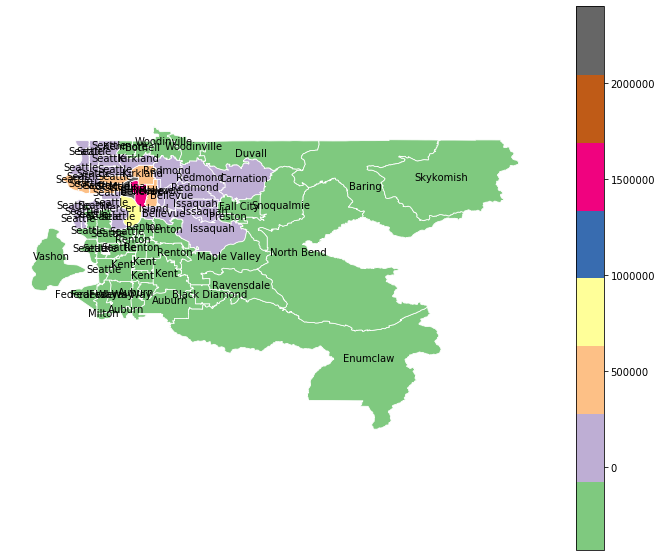

In [23]:
# plt.rcParams['figure.figsize'] = [10, 10] #height, width

vmin, vmax = -430000, 2400000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12,10))

# remove the axis
ax.axis('off')

# add a title and annotation
# ax.set_title('''\nCount of 'Opportunity Youth' \n in South King County \n \n''', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Accent', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

cbar = fig.colorbar(sm)

# create map
merge3.plot(column = (merge3['coef']), cmap='Accent', linewidth=0.8, ax=ax, edgecolor='1')
# Add Labels
merge3['coords'] = merge3['geometry'].apply(lambda x: x.representative_point().coords[:])
merge3['coords'] = [coords[0] for coords in merge3['coords']]

# Display names 
for idx, row in merge3.iterrows():
#     plt.annotate(s=row['OYP'], xy=row['coords'],horizontalalignment='center',fontsize=5)
    plt.annotate(s=row['city'], xy=row['coords'],horizontalalignment='center',fontsize=10)

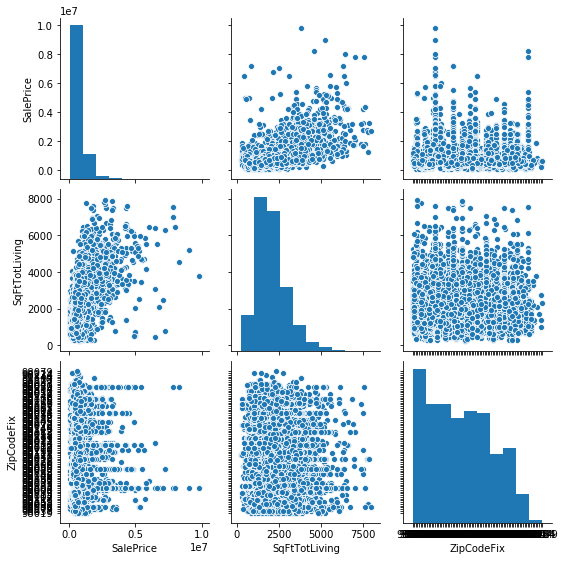

In [24]:
cols = [
    'SalePrice', 'SqFtTotLiving', 'ZipCodeFix'
    
]
colsdf = pvc_df[cols]
sns.pairplot(colsdf)

In [25]:
ols(formula="SalePrice ~ SqFtTotLiving * ZipCodeFix", data=pvc_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     250.7
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:37:37   Log-Likelihood:            -2.3875e+05
No. Observations:               17024   AIC:                         4.778e+05
Df Residuals:                   16864   BIC:                         4.791e+05
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2.018e+05   8.05e+04      2.508      0.012    4.41e+04    3.59e+05
ZipCodeFix[T.98]                      0.0390      0.040      0.965      0.335      -0.040       0.118
ZipCodeFix[T.98001]               -3.172e+04   8.96e+04     -0.354      0.723   -2.07e+05    1.44e+05
ZipCodeFix[T.98002]               -1.267e+04      1e+05     -0.127      0.899   -2.09e+05    1.84e+05
ZipCodeFix[T.98003]               -3.545e+04   9.33e+04     -0.380      0.704   -2.18e+05    1.47e+05
ZipCodeFix[T.98004]                4.268e+04    9.5e+04      0.449      0.653   -1.44e+05    2.29e+05
ZipCodeFix[T.98005]                1.192e+05   1.13e+05      1.054      0.292   -1.03e+05    3.41e+05
ZipCodeFix[T.98006]               -5.755e+04   9.11e+04     -0.632      0.528   -2.36e+05    1.21e+05
ZipCodeFix[T.98007]                -5.19e+04   1.19e+05     -0.438      0.662   -2.84e+05    1.81e+05
ZipCodeFix[T.98008]               -2.136e+05   9.61e+04     -2.223      0.026   -4.02e+05   -2.53e+04
ZipCodeFix[T.98010]               -2.112e+05   1.36e+05     -1.547      0.122   -4.79e+05    5.63e+04
ZipCodeFix[T.98011]                 1.04e+05   1.12e+05      0.929      0.353   -1.16e+05    3.24e+05
ZipCodeFix[T.98014]                1.609e+05   1.16e+05      1.385      0.166   -6.67e+04    3.88e+05
ZipCodeFix[T.98019]               -2363.2717   1.15e+05     -0.020      0.984   -2.28e+05    2.24e+05
ZipCodeFix[T.98022]               -3.906e+04   9.51e+04     -0.411      0.681   -2.25e+05    1.47e+05
ZipCodeFix[T.98023]               -3.494e+04   8.95e+04     -0.390      0.696    -2.1e+05     1.4e+05
ZipCodeFix[T.98024]                5633.5650   1.34e+05      0.042      0.967   -2.58e+05    2.69e+05
ZipCodeFix[T.98027]                2.155e+05   9.88e+04      2.181      0.029    2.18e+04    4.09e+05
ZipCodeFix[T.98028]                 4.86e+04   1.01e+05      0.479      0.632    -1.5e+05    2.47e+05
ZipCodeFix[T.98029]                6593.3561    1.1e+05      0.060      0.952   -2.09e+05    2.23e+05
ZipCodeFix[T.98030]                6576.6527   1.04e+05      0.063      0.950   -1.98e+05    2.11e+05
ZipCodeFix[T.98031]                1.854e+04   9.72e+04      0.191      0.849   -1.72e+05    2.09e+05
ZipCodeFix[T.98032]               -9667.5330   1.07e+05     -0.090      0.928    -2.2e+05    2.01e+05
ZipCodeFix[T.98033]               -1.807e+05   9.16e+04     -1.972      0.049    -3.6e+05   -1123.870
ZipCodeFix[T.98034]               -2.943e+04   8.96e+04     -0.329      0.743   -2.05e+05    1.46e+05
ZipCodeFix[T.98038]               -6.498e+04      9e+04     -0.722      0.470   -2.41e+05    1.11e+05
ZipCodeFix[T.98039]                2.721e+05   1.45e+05      1.882      0.060   -1.13e+04    5.55e+05
ZipCodeFix[T.98040]    

In [26]:
mergeddf2.groupby(['ZipCodeFix']).count()['SalePrice']

ZipCodeFix
98001    374
98002    228
98003    297
98004    232
98005    112
        ... 
98198    247
98199    238
98224      3
98288      9
98354     13
Name: SalePrice, Length: 78, dtype: int64

In [27]:
# One hot encode single column
one_hot_encoder = OneHotEncoder(sparse=False)
#Fit and transform data with one_hot_encoder object
#make sure it is a dataframe not series (df[[column_name]] not df[column_name])
zip_labels = one_hot_encoder.fit_transform(pvc_df[["ZipCodeFix"]])
zip_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# Create dataframe of zipcodes with column labels from one_hot_encoder object
ohe = pd.DataFrame(zip_labels, columns=one_hot_encoder.categories_[0])

# Make zipcode dataframe indices match original dataframe indices
ohe.index = list(pvc_df.index)

In [39]:
ohe3 = ohe.multiply(pvc_df['SqFtTotLiving'],axis='index')


In [40]:
# put both dataframes together along axis 1
final_df = pd.concat([pvc_df, ohe3], axis=1)
final_df = final_df.drop(['ZipCode', 'ZipCodeFix', 'Wfnt','98'], axis=1)

In [41]:
y = final_df['SalePrice']
X = final_df.drop(['SalePrice', '98109'], axis=1)
X = smo.add_constant(X)



In [42]:
paramdf = pd.DataFrame(smo.OLS(y,X).fit().params).reset_index() 
paramdf = paramdf.rename(columns = {'index':'ZipCode',0:'coef'})
paramdf

,ZipCode,coef
0,const,208131.189544
1,SqFtTotLiving,560.355605
2,91844,-268.989505
3,98001,-452.390873
4,98002,-469.088564
...,...,...
77,98198,-423.237610
78,98199,-134.399457
79,98224,-423.712300
80,98288,-535.419735


In [49]:
smo.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     479.2
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:18:17   Log-Likelihood:            -2.3894e+05
No. Observations:               17024   AIC:                         4.780e+05
Df Residuals:                   16942   BIC:                         4.787e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.081e+05   6316.721     32.949      0.000    1.96e+05    2.21e+05
SqFtTotLiving   560.3556     13.669     40.996      0.000     533.564     587.147
91844          -268.9895    144.550     -1.861      0.063    -552.323      14.344
98001          -452.3909     15.408    -29.361      0.000    -482.592    -422.190
98002          -469.0886     18.445    -25.432      0.000    -505.242    -432.935
98003          -450.6890     16.051    -28.079      0.000    -482.150    -419.228
98004            90.9908     14.518      6.267      0.000      62.533     119.448
98005          -162.1013     16.269     -9.964      0.000    -193.990    -130.213
98006          -213.4684     14.502    -14.720      0.000    -241.895    -185.042
98007          -231.7697     19.118    -12.123      0.000    -269.242    -194.297
98008          -187.7615     15.762    -11.912      0.000    -218.656    -156.867
98010          -390.3988     23.677    -16.489      0.000    -436.808    -343.990
98011          -341.1640     16.812    -20.293      0.000    -374.118    -308.210
98014          -314.0890     20.242    -15.517      0.000    -353.765    -274.413
98019          -361.8523     17.708    -20.434      0.000    -396.562    -327.143
98022          -430.8952     16.331    -26.385      0.000    -462.906    -398.884
98023          -453.8158     14.734    -30.800      0.000    -482.696    -424.936
98024          -306.6252     20.655    -14.845      0.000    -347.110    -266.140
98027          -303.9305     15.395    -19.742      0.000    -334.106    -273.755
98028          -343.6125     16.191    -21.222      0.000    -375.349    -311.876
98029          -272.2404     16.380    -16.620      0.000    -304.347    -240.133
98030          -445.6936     16.926    -26.332      0.000    -478.871    -412.517
98031          -440.7328     16.086    -27.399      0.000    -472.263    -409.203
98032          -459.7661     19.180    -23.971      0.000    -497.362    -422.170
98033          -119.9720     15.011     -7.992      0.000    -149.395     -90.549
98034          -265.6975     14.997    -17.716      0.000    -295.094    -236.301
98038          -407.0312     14.857    -27.396      0.000    -436.153    -377.909
98039           343.2656     20.269     16.936      0.000     303.537     382.994
98040           -53.2389     14.756     -3.608      0.000     -82.163     -24.315
98042          -428.4593     14.586    -29.375      0.000    -457.049    -399.870
98045          -352.0026     16.192    -21.739      0.000    -383.741    -320.264
98047          -470.7415     38.324    -12.283      0.000    -545.860    -395.623
98050          -348.1138     49.320     -7.058      0.000    -444.786    -251.442
98051          -372.0787     26.566    -14.006      0.000    -424.151    -320.007
98052          -238.9304     15.124    -15.798   

In [44]:
sf = "///Users/timothycummins/Downloads/tl_2019_us_zcta510"
dbsf = gpd.read_file(sf)
dbsf['ZipCode'] = dbsf['ZCTA5CE10'].copy()

In [45]:
mappable = pd.merge(dbsf,paramdf, how = 'left', on = 'ZipCode')
mappable.dropna(inplace =True)

In [46]:
mappable.describe()

,ALAND10,AWATER10,coef
count,7.700000e+01,7.700000e+01,77.000000
mean,7.196049e+07,3.249109e+06,-296.444071
std,1.722599e+08,4.809723e+06,145.546003
min,3.346515e+06,0.000000e+00,-535.419735
25%,1.203614e+07,5.818390e+05,-414.258049
50%,1.943611e+07,1.890199e+06,-323.803863
75%,4.695253e+07,3.887555e+06,-231.769662
max,1.050783e+09,3.319885e+07,343.265553


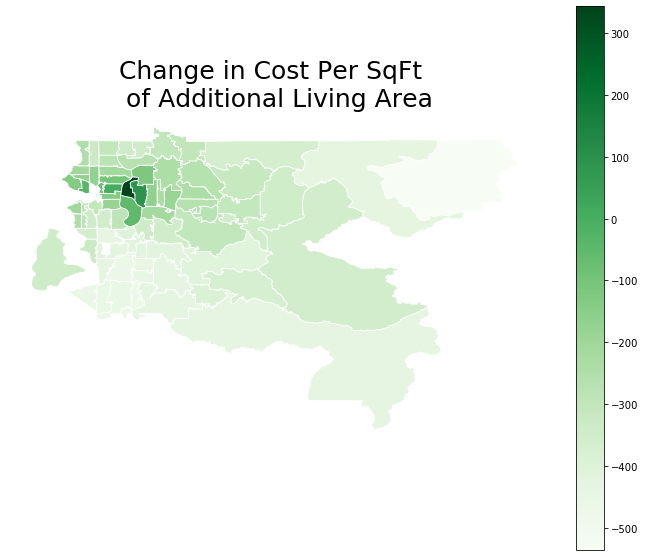

In [47]:
vmin, vmax = -535, 343

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12,10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('''Change in Cost Per SqFt \n of Additional Living Area''', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

cbar = fig.colorbar(sm)

# create map
mappable.plot(column = (mappable['coef']), cmap='Greens', linewidth=0.8, ax=ax, edgecolor='1')
mappable['coords'] = mappable['geometry'].apply(lambda x: x.representative_point().coords[:])
mappable['coords'] = [coords[0] for coords in mappable['coords']]
